In [62]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

In [64]:
import pandas as pd 
from surprise import SVD
from surprise import dataset
from surprise.model_selection import cross_validate
from surprise import Reader


# Probabilistic Matrix Factorization

In [65]:
r_data = pd.read_csv('/content/ratings_small.csv')

In [66]:
r_data

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [67]:
r_data = r_data.rename(columns={"userId": "userID", "movieId": "movieID"}, errors="raise")

In [68]:
r_data

,userID,movieID,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


### Read data from “ratings small.csv” with line format: 'userID movieID rating timestamp'

In [69]:
#r_data = r_data.drop(['timestamp'], axis = 1)
# You'll need to create a dummy reader
reader = Reader(line_format='user item rating timestamp', rating_scale=(1, 5))

# Also, a dummy Dataset class
class MyDataset(dataset.DatasetAutoFolds):

    def __init__(self, df, reader):

        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(df['userID'], df['movieID'], df['rating'])]
        self.reader=reader

In [70]:
r_data = MyDataset(r_data, reader)

### Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation (10 points) Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE. Which ML model is the best in the movie rating data? (10 points)

#### PMF

The famous SVD algorithm, as popularized by Simon Funk during the Netflix Prize. When baselines are not used, this is equivalent to Probabilistic Matrix Factorization and can be achieved by setting the biased parameter to False.

In [71]:
# Use the famous SVD algorithm.
algo = SVD(n_factors = 40, biased = False)

# Run 5-fold cross-validation and print results.
cross_validate(algo, r_data, measures=['RMSE', 'MAE'], cv=5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9749  0.9700  0.9856  0.9884  0.9745  0.9787  0.0071  
MAE (testset)     0.7513  0.7432  0.7568  0.7541  0.7529  0.7517  0.0046  
Fit time          1.00    0.86    0.89    0.84    0.81    0.88    0.06    
Test time         0.10    0.11    0.23    0.11    0.23    0.15    0.06    


{'test_rmse': array([0.97494081, 0.97002748, 0.98564057, 0.98840611, 0.97449371]),
 'test_mae': array([0.75133348, 0.74317901, 0.75681047, 0.75406358, 0.75287264]),
 'fit_time': (0.9985969066619873,
  0.8591780662536621,
  0.8857603073120117,
  0.8403608798980713,
  0.8132612705230713),
 'test_time': (0.09893178939819336,
  0.10636162757873535,
  0.2252519130706787,
  0.10538983345031738,
  0.23469257354736328)}

In [72]:
# Use the famous SVD algorithm.
algo = SVD(biased = False)

# Run 5-fold cross-validation and print results.
cross_validate(algo, r_data, measures=['RMSE', 'MAE'], cv=5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0080  1.0134  1.0004  1.0103  1.0129  1.0090  0.0047  
MAE (testset)     0.7766  0.7827  0.7735  0.7813  0.7787  0.7785  0.0033  
Fit time          1.63    1.19    1.14    1.24    1.05    1.25    0.20    
Test time         0.13    0.23    0.10    0.19    0.09    0.15    0.05    


{'test_rmse': array([1.00795658, 1.01335859, 1.00035174, 1.01026278, 1.01291815]),
 'test_mae': array([0.77656669, 0.7826733 , 0.77350831, 0.78129484, 0.77867353]),
 'fit_time': (1.626462459564209,
  1.1925649642944336,
  1.1357455253601074,
  1.2390379905700684,
  1.0466394424438477),
 'test_time': (0.1258835792541504,
  0.22953557968139648,
  0.09865927696228027,
  0.19315576553344727,
  0.09034490585327148)}

#### user based CF

In [73]:
from surprise import KNNBasic

In [77]:
user_based = KNNBasic(user_based = True) # compute  similarities between users

# Run 5-fold cross-validation and print results.
cross_validate(user_based, r_data, measures=['RMSE', 'MAE'], cv=5, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9662  0.9686  0.9715  0.9647  0.9666  0.9675  0.0024  
MAE (testset)     0.7430  0.7443  0.7461  0.7443  0.7421  0.7439  0.0013  
Fit time          0.09    0.15    0.09    0.08    0.12    0.11    0.02    
Test time         1.52    1.63    1.45    1.31    1.32    1.45    0.12    


{'test_rmse': array([0.96618105, 0.96860029, 0.97153878, 0.96469941, 0.96657305]),
 'test_mae': array([0.74296226, 0.74425958, 0.74605703, 0.74427359, 0.74211538]),
 'fit_time': (0.08736324310302734,
  0.1468796730041504,
  0.09297823905944824,
  0.08118009567260742,
  0.12049484252929688),
 'test_time': (1.515498399734497,
  1.6304824352264404,
  1.4458322525024414,
  1.3093955516815186,
  1.3247261047363281)}

#### Item-based CF

In [79]:
item_based = KNNBasic(user_based = False) # compute  similarities between items

# Run 5-fold cross-validation and print results.
items_cross = cross_validate(item_based, r_data, measures=['RMSE', 'MAE'], cv=5, verbose = True)
items_cross

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9587  0.9641  0.9645  0.9742  0.9718  0.9667  0.0056  
MAE (testset)     0.7365  0.7401  0.7427  0.7494  0.7474  0.7432  0.0047  
Fit time          0.07    0.16    0.09    0.09    0.08    0.10    0.03    
Test time         1.54    1.50    1.20    1.25    1.25    1.35    0.14    


{'test_rmse': array([0.95873664, 0.9640674 , 0.96454358, 0.97423741, 0.97182715]),
 'test_mae': array([0.73648371, 0.74013532, 0.74265675, 0.74939333, 0.74737296]),
 'fit_time': (0.07137179374694824,
  0.16442227363586426,
  0.09013485908508301,
  0.08749842643737793,
  0.08392333984375),
 'test_time': (1.5351686477661133,
  1.5045528411865234,
  1.2020823955535889,
  1.2495002746582031,
  1.2502331733703613)}

### Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE. Which ML model is the best in the movie rating data? (10 points)

**PMF with n_factors** 
--Fold 1  Fold 2  Fold 3  Fold 4  Fold 5 **Mean**         
RMSE (testset)    0.9749  0.9700  0.9856  0.9884  0.9745  **0.9787**  
MAE (testset)     0.7513  0.7432  0.7568  0.7541  0.7529  **0.7517**     


**PMF**
-------------------Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  **Mean**       
RMSE (testset)    1.0080  1.0134  1.0004  1.0103  1.0129  **1.0090**    
MAE (testset)     0.7766  0.7827  0.7735  0.7813  0.7787  **0.7785**  


**User-based**    
---------------------Fold 1  Fold 2  Fold 3  Fold 4  Fold 5 **Mean**      
RMSE (testset)    0.9662  0.9686  0.9715  0.9647  0.9666  **0.9675**  
MAE (testset)     0.7430  0.7443  0.7461  0.7443  0.7421  **0.7439**  


**Item-based** 

------------------Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  **Mean**      
RMSE (testset)    0.9587  0.9641  0.9645  0.9742  0.9718  **0.9667**    
MAE (testset)     0.7365  0.7401  0.7427  0.7494  0.7474  **0.7432**  




**Comment:**
The best Model seems to be Item-based CF 

### Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering. Plot your results. Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering? (10 points)

In [80]:
from surprise.model_selection import GridSearchCV

param_grid = { 'sim_options': {'user_based': [True, False]},'name': ['cosine', 'MSD', 'pearson_baseline' ]}

gs_u_cf = GridSearchCV(KNNBasic, param_grid, measures = ['rmse', 'mae'], cv = 5)
gs_u_cf.fit(r_data)

print(gs_u_cf.best_score['rmse'])
print(gs_u_cf.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [81]:
import matplotlib.pyplot as plt
import numpy as np

cv_result = pd.DataFrame(gs_u_cf.cv_results)

cv_result

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,...,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_sim_options,param_name
0,0.975094,0.955501,0.968662,0.973608,0.973364,0.969246,0.007204,4,0.752065,0.736656,...,0.745424,0.005526,4,0.085400,0.025292,1.410176,0.183037,"{'sim_options': {'user_based': True}, 'name': ...",{'user_based': True},cosine
1,0.975094,0.955501,0.968662,0.973608,0.973364,0.969246,0.007204,5,0.752065,0.736656,...,0.745424,0.005526,5,0.070774,0.005032,1.322123,0.157752,"{'sim_options': {'user_based': True}, 'name': ...",{'user_based': True},MSD
2,0.975094,0.955501,0.968662,0.973608,0.973364,0.969246,0.007204,6,0.752065,0.736656,...,0.745424,0.005526,6,0.091760,0.007975,1.293206,0.122332,"{'sim_options': {'user_based': True}, 'name': ...",{'user_based': True},pearson_baseline
3,0.936291,0.927946,0.935490,0.930029,0.945099,0.934971,0.005973,1,0.722101,0.714953,...,0.720793,0.004267,1,2.734004,0.648618,5.740440,0.385108,"{'sim_options': {'user_based': False}, 'name':...",{'user_based': False},cosine
4,0.936291,0.927946,0.935490,0.930029,0.945099,0.934971,0.005973,2,0.722101,0.714953,...,0.720793,0.004267,2,2.365784,0.154792,5.225378,0.209659,"{'sim_options': {'user_based': False}, 'name':...",{'user_based': False},MSD
5,0.936291,0.927946,0.935490,0.930029,0.945099,0.934971,0.005973,3,0.722101,0.714953,...,0.720793,0.004267,3,2.310055,0.132079,5.339077,0.349051,"{'sim_options': {'user_based': False}, 'name':...",{'user_based': False},pearson_baseline


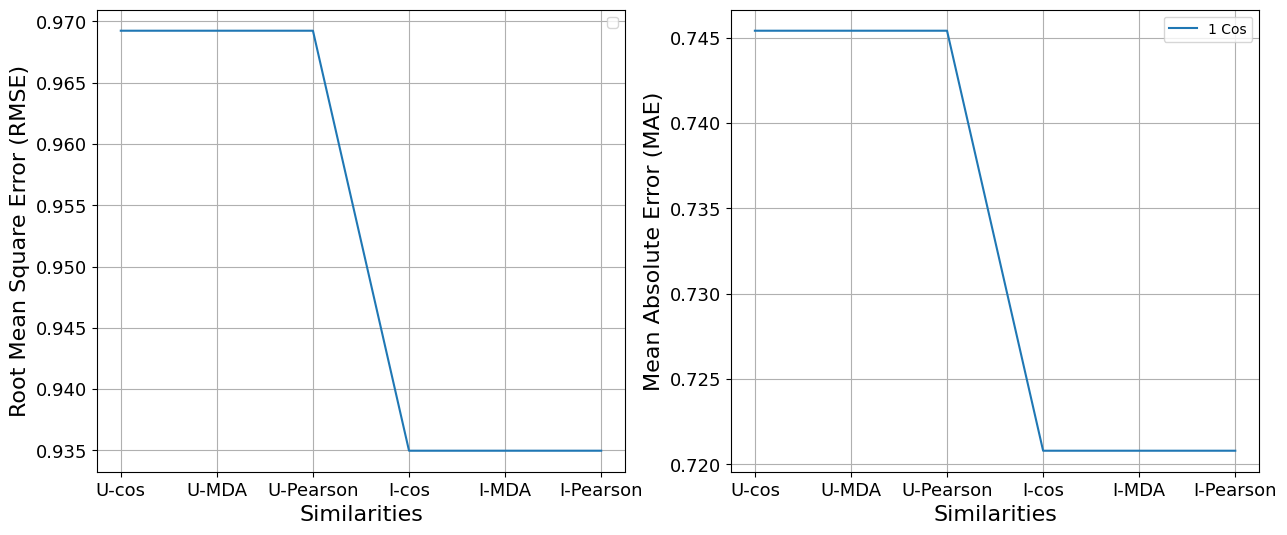

In [82]:
fig = plt.figure(figsize=(15, 6))
plt.subplot(121)

plt.plot(cv_result['mean_test_rmse'])


plt.xticks(np.arange(6), ['U-cos', 'U-MDA', 'U-Pearson', 'I-cos', 'I-MDA', 'I-Pearson'], fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Similarities', fontsize=16)
plt.ylabel('Root Mean Square Error (RMSE)', fontsize=16)
plt.grid()
plt.legend()

plt.subplot(122)

plt.plot(cv_result['mean_test_mae'])


plt.xticks(np.arange(6), ['U-cos', 'U-MDA', 'U-Pearson', 'I-cos', 'I-MDA', 'I-Pearson'], fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Similarities', fontsize=16)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=16)
plt.grid()
plt.legend(['1 Cos'])

plt.show()



**Comment:** The results were better for the item base CF but similarities tend to do the same % of error.

### Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results. (10 points) Identify the best number of neighbor (denoted by K) for User/Item based collaborative filtering in terms of RMSE. Is the best K of User based collaborative filtering the same with the best K of Item based collaborative filtering? (10 points)

In [83]:
param_grid = { 'k': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],'sim_options': {'user_based': [True, False]}}

bestK_cf = GridSearchCV(KNNBasic, param_grid, measures = ['rmse', 'mae'], cv = 5)
bestK_cf.fit(r_data)

print(bestK_cf.best_score['rmse'])
print(bestK_cf.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [84]:
cv_bestK_result = pd.DataFrame(bestK_cf.cv_results)

cv_bestK_result

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,...,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_k,param_sim_options
0,0.962673,0.967252,0.964857,0.960525,0.970004,0.965062,0.003333,11,0.734615,0.742598,...,0.738242,0.003306,11,0.069511,0.007899,1.074672,0.192067,"{'k': 10, 'sim_options': {'user_based': True}}",10,{'user_based': True}
1,0.971945,0.968806,0.978094,0.972348,0.976220,0.973483,0.003295,16,0.750939,0.748463,...,0.753119,0.003621,19,2.278583,0.060792,4.565756,0.381073,"{'k': 10, 'sim_options': {'user_based': False}}",10,{'user_based': False}
2,0.961014,0.964809,0.962198,0.959680,0.967055,0.962951,0.002658,10,0.735770,0.741486,...,0.738043,0.002452,10,0.066530,0.005549,1.057688,0.088214,"{'k': 20, 'sim_options': {'user_based': True}}",20,{'user_based': True}
3,0.947262,0.944584,0.948343,0.945885,0.950681,0.947351,0.002092,9,0.730214,0.729109,...,0.731796,0.001998,9,2.301151,0.172824,4.867929,0.317762,"{'k': 20, 'sim_options': {'user_based': False}}",20,{'user_based': False}
4,0.964050,0.967704,0.965436,0.962774,0.970543,0.966101,0.002758,12,0.739121,0.745279,...,0.741691,0.002593,12,0.071173,0.014019,1.186818,0.138637,"{'k': 30, 'sim_options': {'user_based': True}}",30,{'user_based': True}
5,0.938597,0.935661,0.939038,0.937338,0.940556,0.938238,0.001649,8,0.722505,0.722419,...,0.724030,0.001575,8,2.327774,0.121253,5.207912,0.245741,"{'k': 30, 'sim_options': {'user_based': False}}",30,{'user_based': False}
6,0.966685,0.970354,0.968401,0.965547,0.972955,0.968788,0.002642,13,0.742032,0.748353,...,0.744634,0.002544,13,0.094550,0.039273,1.342153,0.298605,"{'k': 40, 'sim_options': {'user_based': True}}",40,{'user_based': True}
7,0.934629,0.932566,0.935626,0.933238,0.937139,0.934640,0.001642,7,0.719382,0.719906,...,0.720892,0.001430,7,2.362280,0.117433,5.725341,0.239991,"{'k': 40, 'sim_options': {'user_based': False}}",40,{'user_based': False}
8,0.968746,0.972624,0.970544,0.967690,0.975139,0.970949,0.002683,14,0.744544,0.750703,...,0.747026,0.002615,14,0.076905,0.027333,1.320186,0.173595,"{'k': 50, 'sim_options': {'user_based': True}}",50,{'user_based': True}
9,0.932911,0.931196,0.933779,0.931643,0.934822,0.932870,0.001338,6,0.717737,0.718616,...,0.719326,0.001335,6,2.349310,0.060838,6.049040,0.250220,"{'k': 50, 'sim_options': {'user_based': False}}",50,{'user_based': False}


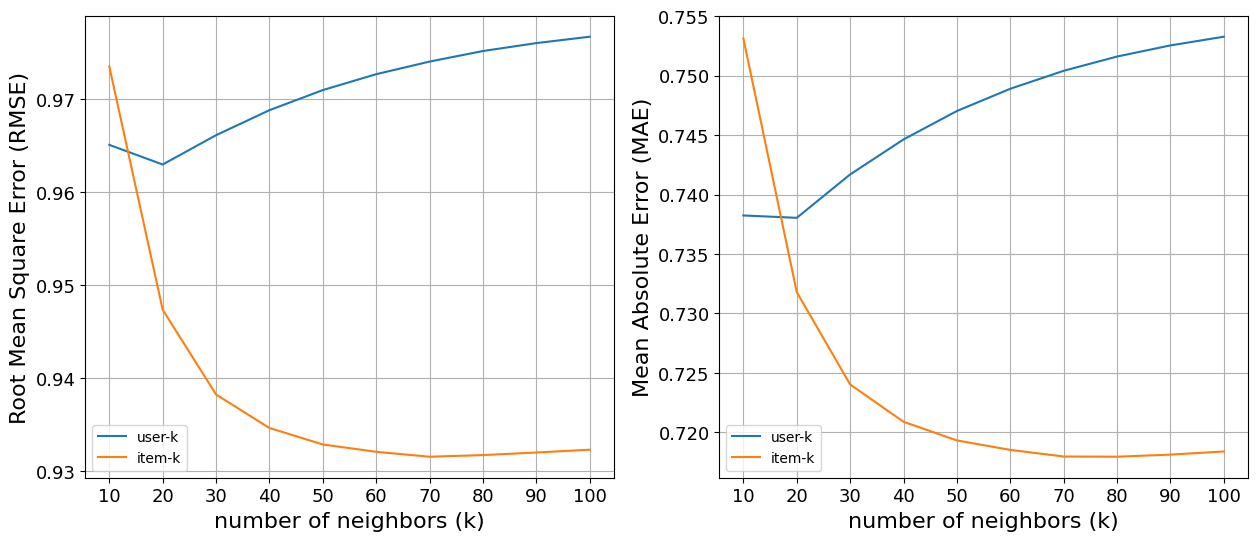

In [85]:
index = np.arange(0, 20, 2)

fig = plt.figure(figsize=(15, 6))
plt.subplot(121)

plt.plot(cv_bestK_result.loc[index, 'mean_test_rmse'].tolist(), label='user-k')
plt.plot(cv_bestK_result.loc[index+1, 'mean_test_rmse'].tolist(), label='item-k')


plt.xticks(np.arange(10), np.arange(10, 110, 10), fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('number of neighbors (k)', fontsize=16)
plt.ylabel('Root Mean Square Error (RMSE)', fontsize=16)
plt.grid()
plt.legend()

plt.subplot(122)

plt.plot(cv_bestK_result.loc[index, 'mean_test_mae'].tolist(), label='user-k')
plt.plot(cv_bestK_result.loc[index+1, 'mean_test_mae'].tolist(), label='item-k')

plt.xticks(np.arange(10), np.arange(10, 110, 10), fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('number of neighbors (k)', fontsize=16)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=16)
plt.grid()
plt.legend()



plt.show()

In [86]:
print(bestK_cf.best_score['rmse'])
print(bestK_cf.best_params['rmse'])

print(bestK_cf.best_score['mae'])
print(bestK_cf.best_params['mae'])

0.9315520730795559
{'k': 70, 'sim_options': {'user_based': False}}
0.7179529926219972
{'k': 80, 'sim_options': {'user_based': False}}


**Comment:**

Best K for Item based is 80
Best K for User based is 20

Final results:

The best k for user and irem based were not the same by a huge difference in performance. 